In [1]:
import numpy as np
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cars = sns.load_dataset('mpg')

In [4]:
cars.sample(n=3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
319,31.3,4,120.0,75.0,2542,17.5,80,japan,mazda 626
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu


<AxesSubplot:xlabel='displacement', ylabel='mpg'>

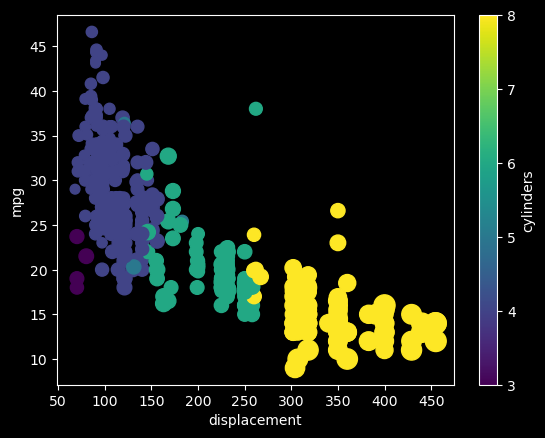

In [13]:
plt.style.use('dark_background')
cars.plot.scatter(x='displacement', y='mpg', s='horsepower', c='cylinders', cmap='viridis')

In [15]:
pvt = cars.pivot_table(index='cylinders', columns='origin', values='horsepower', aggfunc='mean')

In [17]:
def categ(v):
    if v>100:
        return 'More than 100'
    elif v>90:
        return 'B/W 90 to 100'
    else:
        return 'Less than 90'

def make_pretty(frame_styler):
    frame_styler.set_caption('Cars: Avg. Horsepower by Cylinders')
    frame_styler.format(categ)
    frame_styler.format_index(lambda x: f'Cars with {x} Cylinders')

pvt.style.pipe(make_pretty)

In [21]:
weather_df = pd.DataFrame(np.random.rand(10,2)*5,
                          index=pd.date_range(start="2021-01-01", periods=10),
                          columns=["Tokyo", "Beijing"])

def rain_condition(v):
    if v < 1.75:
        return "Dry"
    elif v < 2.75:
        return "Rain"
    return "Heavy Rain"

def make_pretty(styler):
    styler.set_caption("Weather Conditions")
    styler.format(rain_condition)
    styler.format_index(lambda v: v.strftime("%A"))
    styler.background_gradient(axis=None, vmin=1, vmax=5, cmap="YlGnBu")
    return styler

weather_df

,Tokyo,Beijing
2021-01-01,1.785378,1.467202
2021-01-02,2.722052,3.229773
2021-01-03,1.621518,4.169830
2021-01-04,0.561094,0.889553
2021-01-05,4.487455,0.067201
2021-01-06,4.088879,3.405495
2021-01-07,4.305942,2.908197
2021-01-08,0.679868,3.900177
2021-01-09,0.272995,2.695143
2021-01-10,2.686614,2.397131


In [22]:
weather_df.style.pipe(make_pretty)

,Tokyo,Beijing
Friday,Rain,Dry
Saturday,Rain,Heavy Rain
Sunday,Dry,Heavy Rain
Monday,Dry,Dry
Tuesday,Heavy Rain,Dry
Wednesday,Heavy Rain,Heavy Rain
Thursday,Heavy Rain,Heavy Rain
Friday,Dry,Heavy Rain
Saturday,Dry,Rain
Sunday,Rain,Rain
